In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
directory_path = '/content/drive/MyDrive/PlantVillage'

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle=True,
    image_size=(256, 256),  # Images are resized to 256x256
    batch_size=32)

Found 2152 files belonging to 3 classes.


In [5]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [6]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),  # Resize images to 224x224
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [7]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
])

In [8]:
train_dataset = train_dataset.map(lambda x, y: (resize_and_rescale(x), y))
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

val_dataset = val_dataset.map(lambda x, y: (resize_and_rescale(x), y))
test_dataset = test_dataset.map(lambda x, y: (resize_and_rescale(x), y))

In [9]:

import tensorflow_hub as hub

In [10]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

num_of_classes = len(dataset.class_names)

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    layers.Dropout(0.5),  # Adding dropout for regularization
    layers.Dense(num_of_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Using Adam optimizer with a lower learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_dataset,
    epochs=100,  # Increase the number of epochs
    validation_data=val_dataset
)

Epoch 1/100
54/54 [==============================] - 230s 3s/step - loss: 1.1504 - accuracy: 0.5052 - val_loss: 0.8701 - val_accuracy: 0.5655
Epoch 2/100
54/54 [==============================] - 102s 2s/step - loss: 0.8668 - accuracy: 0.6429 - val_loss: 0.7093 - val_accuracy: 0.7321
Epoch 3/100
54/54 [==============================] - 118s 2s/step - loss: 0.7519 - accuracy: 0.6840 - val_loss: 0.5851 - val_accuracy: 0.7857
Epoch 4/100
54/54 [==============================] - 111s 2s/step - loss: 0.5892 - accuracy: 0.7650 - val_loss: 0.5587 - val_accuracy: 0.7976
Epoch 5/100
54/54 [==============================] - 111s 2s/step - loss: 0.5320 - accuracy: 0.7865 - val_loss: 0.4199 - val_accuracy: 0.8690
Epoch 6/100
54/54 [==============================] - 110s 2s/step - loss: 0.4768 - accuracy: 0.8183 - val_loss: 0.4399 - val_accuracy: 0.8452
Epoch 7/100
54/54 [==============================] - 111s 2s/step - loss: 0.4295 - accuracy: 0.8333 - val_loss: 0.4028 - val_accuracy: 0.8750
Epoch 

In [12]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")

8/8 [==============================] - 15s 866ms/step - loss: 0.0825 - accuracy: 0.9766
Test Accuracy: 0.9765625


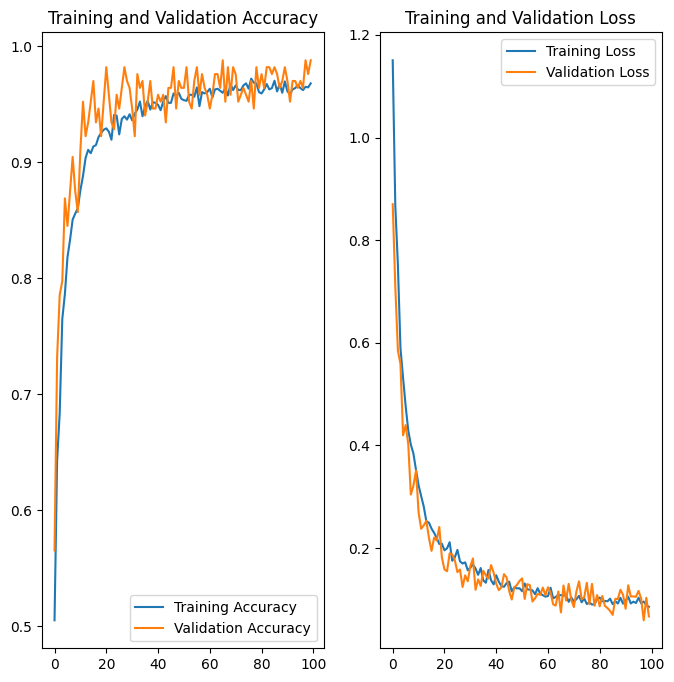

In [13]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/saved model potato/potato plant.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model.save('/content/drive/MyDrive/MyFolder/myModelmobilenet.h5')